# HW6: Imitation Learning

> - Full Name: **Danial Parnian**
> - Student ID: **401110307**
<!--

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DeepRLCourse/Homework-5-Questions/blob/main/RL_HW11_Dyna.ipynb)
[![Open In kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/DeepRLCourse/Homework-11-Questions/main/RL_HW5_Dyna.ipynb) -->

## Overview
This assignment investigates the strengths and limitations of both reinforcement learning (PPO, A2C) and imitation learning (DAgger, GAIL) by applying them to control tasks. Students train and evaluate agents using expert demonstrations and environment feedback, gaining hands-on experience in designing and comparing learning algorithms across paradigms.


### **Exercise 1: Training PPO, A2C, and DAgger on CartPole-v1** (60 Points)

This exercise focuses on comparing reinforcement learning (PPO, A2C) and imitation learning (DAgger) techniques on the CartPole-v1 environment. An expert policy is first trained using PPO, then used to guide a DAgger agent. Separately, an A2C agent is trained directly via interaction with the environment. Performance metrics are collected to assess how each approach learns and generalizes.

---

### **Exercise 2: Training a GAIL Model Using an Expert Policy** (100 Points)

In this task, a GAIL (Generative Adversarial Imitation Learning) agent is trained to imitate a pre-trained expert policy in several environments (e.g., CartPole-v1, Pendulum-v0, BipedalWalker-v3). The training process involves configuring the environment, initializing models, and iteratively training the agent to match the expert’s behavior using adversarial learning.


In [ ]:
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 5.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

In [ ]:
!pip install imitation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 5.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
  Attempting uninstall: stable-baselines3
    Found existing installation: stable-baselines3 2.1.0
    Uninstalling stable-baselines3-2.1.0:
      Successfully uninstalled stable-baselines3-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
kaggle-environments 1.17.6 requires stable-bas

In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO, DQN
from imitation.util.util import make_vec_env
from imitation.algorithms.dagger import SimpleDAggerTrainer
from imitation.algorithms import bc
from imitation.policies.serialize import load_policy
import os
import json
import pickle
import argparse
import torch
import tempfile
import numpy as np
from stable_baselines3 import PPO,DQN,A2C
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

# Training PPO, A2C, and DAgger on the CartPole-v1 Environment

In this section, we explore and compare multiple reinforcement learning and imitation learning approaches within the classic **CartPole-v1** environment. The algorithms used include:

- **Proximal Policy Optimization (PPO)** – a stable, on-policy RL algorithm.
- **Advantage Actor-Critic (A2C)** – another on-policy RL algorithm known for simplicity and efficiency.
- **DAgger (Dataset Aggregation)** – an imitation learning algorithm that iteratively refines a policy using expert guidance.

---

## Main Objectives

1. **Train an expert policy using PPO**.
2. **Use the PPO expert to train a new agent via DAgger**.
3. **Train a separate agent using A2C directly**.
4. **Compare performance between PPO, DAgger, and A2C**.

This setup allows us to analyze the strengths of:
- **Reinforcement learning** (PPO and A2C) that learns from environment feedback.
- **Imitation learning** (DAgger) that learns from an expert’s demonstrations and corrections.

---

### 1. PPO Expert Training (15 Points)
- A PPO agent is trained in the CartPole-v1 environment using `stable-baselines3`.
- The model is saved and later reloaded as an expert policy for imitation learning.
- Training is done in intervals and evaluated periodically to track average rewards.

In [ ]:
# Create the CartPole-v1 environment
env = gym.make("CartPole-v1")

model = PPO("MlpPolicy", env, verbose=1)
regular_rewards = []

# Training loop
total_timesteps = 10000
eval_freq = 1000

for timestep in range(0, total_timesteps, eval_freq):
    model.learn(total_timesteps=eval_freq)

    # Evaluate the model and record the reward
    reward, _ = evaluate_policy(model, env, n_eval_episodes=10)
    regular_rewards.append(reward)

    print(f"Regular Training - Step {timestep + eval_freq}: Mean Reward = {reward}")

model.save("CartPole_v1_PPO_model.zip")
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | 21.5     |
| time/              |          |
|    fps             | 646      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Regular Training - Step 1000: Mean Reward = 259.2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.9     |
|    ep_rew_mean     | 27.9     |
| time/              |          |
|    fps             | 779      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
Regular Training - Step 2000: Mean Reward = 170.6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.3     |
|    ep_rew_mean     | 37.3     |
| time/              |          |
|    fps             | 775      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
Regular Training - Step 3000: Mean Reward = 291.2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 65.1     |
|    ep_rew_mean     | 65.1     |
| time/              |          |


### 2. DAgger Training with the PPO Expert (25 Points)
- A `BehaviorCloning` trainer is used to initialize the DAgger process.
- A `SimpleDAggerTrainer` collects data from both the expert and the learner during training.
- The model is updated incrementally and evaluated periodically.
- Performance rewards are stored to track learning progress.

In [ ]:
# Load the PPO model manually using Stable-Baselines3's load method
expert = PPO.load("CartPole_v1_PPO_model.zip")

# Create vectorized environment for imitation learning
rng = np.random.default_rng(0)
venv = make_vec_env("CartPole-v1", n_envs=1, rng=rng)

# Initialize the Behavior Cloning (BC) trainer
bc_trainer = bc.BC(
    observation_space=venv.observation_space,
    action_space=venv.action_space,
    rng=rng,
    policy=expert.policy
)

# Record rewards during DAgger training
dagger_rewards = []

# Train using DAgger
with tempfile.TemporaryDirectory(prefix="dagger_example_") as tmpdir:
    dagger_trainer = SimpleDAggerTrainer(
        venv=venv,
        scratch_dir=tmpdir,
        expert_policy=expert,
        bc_trainer=bc_trainer,
        rng=rng
    )

    # Training loop for DAgger
    total_dagger_timesteps = 8000
    eval_freq = 1000
    for timestep in range(0, total_dagger_timesteps, eval_freq):
        dagger_trainer.train(eval_freq)

        # Evaluate the model and record the reward
        reward, _ = evaluate_policy(dagger_trainer.policy, venv, n_eval_episodes=10)
        dagger_rewards.append(reward)
        print(f"DAgger Training - Step {timestep + eval_freq}: Mean Reward = {reward}")

# Save the DAgger policy
dagger_trainer.policy.save("CartPole_v1_DAgger_model.zip")
venv.close()

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000606 |
|    entropy        | 0.606     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 377       |
|    loss           | 0.457     |
|    neglogp        | 0.457     |
|    prob_true_act  | 0.648     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 363       |
|    return_min     | 305       |
|    return_std     | 71.6      |
---------------------------------


23batch [00:01, 16.56batch/s]
67batch [00:02, 57.55batch/s]
112batch [00:02, 105.69batch/s]A
155batch [00:02, 144.16batch/s]
168batch [00:02, 64.87batch/s] 


DAgger Training - Step 1000: Mean Reward = 493.6


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000359 |
|    entropy        | 0.359     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 392       |
|    loss           | 0.31      |
|    neglogp        | 0.31      |
|    prob_true_act  | 0.768     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 351       |
|    return_min     | 192       |
|    return_std     | 101       |
---------------------------------


89batch [00:02, 84.49batch/s]
156batch [00:02, 151.19batch/s]A
267batch [00:02, 201.31batch/s]
355batch [00:03, 211.74batch/s]
356batch [00:03, 106.84batch/s]


DAgger Training - Step 2000: Mean Reward = 500.0


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00036 |
|    entropy        | 0.36     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 418      |
|    loss           | 0.363    |
|    neglogp        | 0.363    |
|    prob_true_act  | 0.752    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 500      |
|    return_mean    | 489      |
|    return_min     | 447      |
|    return_std     | 20.9     |
--------------------------------


133batch [00:02, 113.36batch/s]
267batch [00:03, 199.53batch/s]
399batch [00:04, 211.91batch/s]
487batch [00:04, 212.70batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000297 |
|    entropy        | 0.297     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 447       |
|    loss           | 0.217     |
|    neglogp        | 0.218     |
|    prob_true_act  | 0.832     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


532batch [00:07, 37.52batch/s] 
540batch [00:07, 75.33batch/s]


DAgger Training - Step 3000: Mean Reward = 495.3


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000142 |
|    entropy        | 0.142     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 449       |
|    loss           | 0.0783    |
|    neglogp        | 0.0785    |
|    prob_true_act  | 0.934     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 481       |
|    return_min     | 423       |
|    return_std     | 29.8      |
---------------------------------


178batch [00:03, 152.42batch/s]
353batch [00:03, 208.29batch/s]
489batch [00:04, 218.50batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -0.00017 |
|    entropy        | 0.17     |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 482      |
|    loss           | 0.181    |
|    neglogp        | 0.181    |
|    prob_true_act  | 0.894    |
|    samples_so_far | 16032    |
| rollout/          |          |
|    return_max     | 500      |
|    return_mean    | 500      |
|    return_min     | 500      |
|    return_std     | 0        |
--------------------------------


532batch [00:07, 36.29batch/s] 
718batch [00:08, 169.74batch/s][A
728batch [00:08, 88.71batch/s] 


DAgger Training - Step 4000: Mean Reward = 500.0


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000168 |
|    entropy        | 0.168     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 493       |
|    loss           | 0.112     |
|    neglogp        | 0.112     |
|    prob_true_act  | 0.916     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


218batch [00:03, 179.45batch/s]
444batch [00:04, 221.72batch/s]
490batch [00:04, 220.16batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000245 |
|    entropy        | 0.245     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 516       |
|    loss           | 0.217     |
|    neglogp        | 0.217     |
|    prob_true_act  | 0.848     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 490       |
|    return_min     | 450       |
|    return_std     | 20        |
---------------------------------


669batch [00:07, 138.53batch/s]
894batch [00:08, 217.75batch/s]
916batch [00:09, 101.77batch/s]


DAgger Training - Step 5000: Mean Reward = 500.0


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000208 |
|    entropy        | 0.208     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 530       |
|    loss           | 0.278     |
|    neglogp        | 0.279     |
|    prob_true_act  | 0.872     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


271batch [00:03, 200.25batch/s]
494batch [00:04, 217.28batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000172 |
|    entropy        | 0.172     |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 549       |
|    loss           | 0.116     |
|    neglogp        | 0.116     |
|    prob_true_act  | 0.911     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


539batch [00:07, 38.02batch/s] 
807batch [00:08, 202.41batch/s][A
987batch [00:09, 218.78batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -0.000201 |
|    entropy        | 0.201     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 565       |
|    loss           | 0.234     |
|    neglogp        | 0.234     |
|    prob_true_act  | 0.861     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


1099batch [00:12, 83.32batch/s]
1100batch [00:12, 90.89batch/s]


DAgger Training - Step 6000: Mean Reward = 500.0


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000143 |
|    entropy        | 0.143     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 568       |
|    loss           | 0.077     |
|    neglogp        | 0.0771    |
|    prob_true_act  | 0.935     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


305batch [00:03, 203.57batch/s]
481batch [00:04, 212.56batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000223 |
|    entropy        | 0.223     |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 588       |
|    loss           | 0.255     |
|    neglogp        | 0.256     |
|    prob_true_act  | 0.844     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


635batch [00:07, 118.32batch/s]
964batch [00:09, 215.93batch/s]
986batch [00:09, 214.45batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -0.000142 |
|    entropy        | 0.142     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 607       |
|    loss           | 0.0839    |
|    neglogp        | 0.084     |
|    prob_true_act  | 0.932     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


1276batch [00:13, 197.61batch/s]
1288batch [00:13, 97.34batch/s] 


DAgger Training - Step 7000: Mean Reward = 500.0


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000218 |
|    entropy        | 0.218     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 617       |
|    loss           | 0.159     |
|    neglogp        | 0.16      |
|    prob_true_act  | 0.879     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 500       |
|    return_min     | 500       |
|    return_std     | 0         |
---------------------------------


354batch [00:03, 212.62batch/s]
486batch [00:04, 208.34batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 500      |
|    ent_loss       | -0.00016 |
|    entropy        | 0.16     |
|    epoch          | 1        |
|    l2_loss        | 0        |
|    l2_norm        | 638      |
|    loss           | 0.159    |
|    neglogp        | 0.16     |
|    prob_true_act  | 0.903    |
|    samples_so_far | 16032    |
| rollout/          |          |
|    return_max     | 500      |
|    return_mean    | 500      |
|    return_min     | 500      |
|    return_std     | 0        |
--------------------------------


727batch [00:08, 180.49batch/s]
992batch [00:09, 216.83batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -0.000151 |
|    entropy        | 0.151     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 657       |
|    loss           | 0.245     |
|    neglogp        | 0.245     |
|    prob_true_act  | 0.869     |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | 500       |
|    return_mean    | 496       |
|    return_min     | 482       |
|    return_std     | 7.2       |
---------------------------------


1103batch [00:12, 82.73batch/s]
1457batch [00:13, 215.90batch/s][A
1476batch [00:13, 106.33batch/s]


DAgger Training - Step 8000: Mean Reward = 500.0


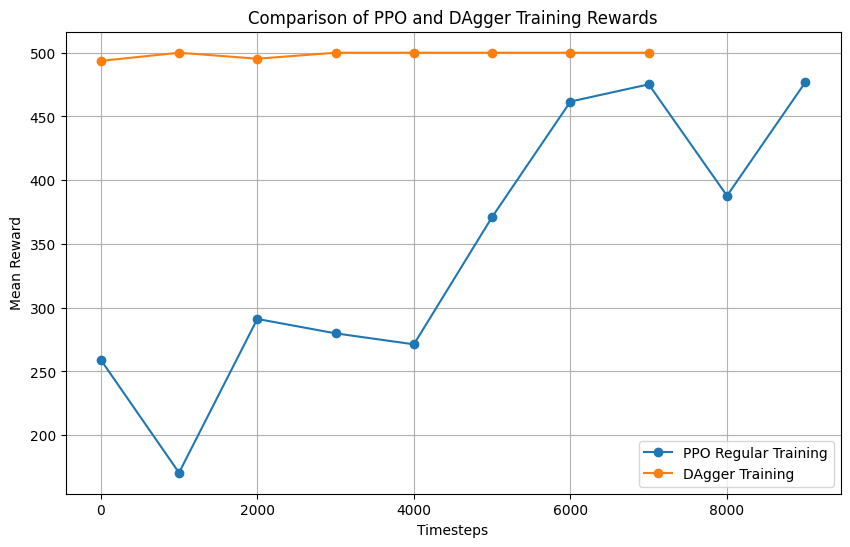

In [ ]:
# Plot the rewards for Regular PPO Training and DAgger Training
plt.figure(figsize=(10, 6))
plt.plot(range(0, 10000, 1000), regular_rewards, label="PPO Regular Training", marker="o")
plt.plot(range(0, 8000, 1000), dagger_rewards, label="DAgger Training", marker="o")
plt.xlabel("Timesteps")
plt.ylabel("Mean Reward")
plt.title("Comparison of PPO and DAgger Training Rewards")
plt.legend()
plt.grid(True)
plt.show()


### 3. A2C Agent Training (20 Points)
After DAgger training, a third agent is trained using the **Advantage Actor-Critic (A2C)** algorithm.

In [ ]:
# Create the CartPole-v1 environment
env = gym.make("CartPole-v1")

# Initialize the A2C model
model = A2C("MlpPolicy", env, verbose=1)

# Record rewards during training
regular_rewards = []

# Training loop
total_timesteps = 10000
eval_freq = 1000
for timestep in range(0, total_timesteps, eval_freq):
    model.learn(total_timesteps=eval_freq)

    # Evaluate the model and record the reward
    reward, _ = evaluate_policy(model, env, n_eval_episodes=10)
    regular_rewards.append(reward)
    print(f"Regular Training - Step {timestep + eval_freq}: Mean Reward = {reward}")

# Save the model after training
model.save("CartPole_v1_A2C_model.zip")
env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 13.2     |
|    ep_rew_mean        | 13.2     |
| time/                 |          |
|    fps                | 460      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.624   |
|    explained_variance | -0.215   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.07     |
|    value_loss         | 10.3     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 14.2     |
|    ep_rew_mean        | 14.2     |
| time/                 |          |
|    fps                | 460      |
|    iterations         | 200      |
|    time_elapsed

In [ ]:
# Load the A2C model manually using Stable-Baselines3's load method
expert = A2C.load("CartPole_v1_A2C_model.zip")

# Create vectorized environment for imitation learning
rng = np.random.default_rng(0)
venv = make_vec_env("CartPole-v1", n_envs=1, rng=rng)

# Initialize the Behavior Cloning (BC) trainer
bc_trainer = bc.BC(
    observation_space=venv.observation_space,
    action_space=venv.action_space,
    rng=rng,
    policy=expert.policy
)

# Record rewards during DAgger training
dagger_rewards = []

# Train using DAgger
with tempfile.TemporaryDirectory(prefix="dagger_example_") as tmpdir:
    dagger_trainer = SimpleDAggerTrainer(
        venv=venv,
        scratch_dir=tmpdir,
        expert_policy=expert,
        bc_trainer=bc_trainer,
        rng=rng
    )

    # Training loop for DAgger
    total_dagger_timesteps = 8000
    eval_freq = 1000
    for timestep in range(0, total_dagger_timesteps, eval_freq):
        dagger_trainer.train(eval_freq)  # Train the agent for `eval_freq` timesteps

        # Evaluate the model and record the reward
        reward, _ = evaluate_policy(dagger_trainer.policy, venv, n_eval_episodes=10)
        dagger_rewards.append(reward)
        print(f"DAgger Training - Step {timestep + eval_freq}: Mean Reward = {reward}")

# Close the environment after DAgger training
venv.close()

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00059 |
|    entropy        | 0.59     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 351      |
|    loss           | 0.385    |
|    neglogp        | 0.386    |
|    prob_true_act  | 0.689    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 166      |
|    return_mean    | 118      |
|    return_min     | 88       |
|    return_std     | 28.9     |
--------------------------------


1batch [00:00,  1.75batch/s]
23batch [00:00, 45.14batch/s][A
44batch [00:00, 81.17batch/s]
Epoch 2 of 4                 
64batch [00:00, 73.11batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

--------------------------------
| batch_size        | 32       |
| bc/               |          |
|    batch          | 0        |
|    ent_loss       | -0.00025 |
|    entropy        | 0.25     |
|    epoch          | 0        |
|    l2_loss        | 0        |
|    l2_norm        | 361      |
|    loss           | 0.164    |
|    neglogp        | 0.165    |
|    prob_true_act  | 0.873    |
|    samples_so_far | 32       |
| rollout/          |          |
|    return_max     | 199      |
|    return_mean    | 156      |
|    return_min     | 124      |
|    return_std     | 27.8     |
--------------------------------


22batch [00:00, 34.95batch/s]
64batch [00:01, 97.27batch/s]
103batch [00:01, 137.37batch/s]A
123batch [00:01, 152.93batch/s]
140batch [00:01, 97.60batch/s] 


DAgger Training - Step 1000: Mean Reward = 152.1


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000163 |
|    entropy        | 0.163     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 374       |
|    loss           | 0.069     |
|    neglogp        | 0.0692    |
|    prob_true_act  | 0.94      |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 194       |
|    return_mean    | 168       |
|    return_min     | 139       |
|    return_std     | 24.1      |
---------------------------------


44batch [00:00, 65.80batch/s]
87batch [00:01, 122.69batch/s][A
153batch [00:01, 177.18batch/s][A
196batch [00:01, 194.21batch/s]
208batch [00:01, 117.86batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -7.45e-05 |
|    entropy        | 0.0745    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 386       |
|    loss           | 0.0581    |
|    neglogp        | 0.0582    |
|    prob_true_act  | 0.956     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 180       |
|    return_mean    | 143       |
|    return_min     | 121       |
|    return_std     | 21        |
---------------------------------


67batch [00:00, 106.31batch/s]
133batch [00:01, 170.29batch/s][A
196batch [00:01, 186.26batch/s]
258batch [00:01, 191.93batch/s]
272batch [00:02, 135.67batch/s]


DAgger Training - Step 2000: Mean Reward = 152.5


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -6.55e-05 |
|    entropy        | 0.0655    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 395       |
|    loss           | 0.0371    |
|    neglogp        | 0.0372    |
|    prob_true_act  | 0.97      |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 211       |
|    return_mean    | 166       |
|    return_min     | 131       |
|    return_std     | 30        |
---------------------------------


67batch [00:01, 96.79batch/s]
154batch [00:01, 175.85batch/s]A
244batch [00:01, 209.19batch/s]
334batch [00:02, 218.01batch/s]
344batch [00:02, 143.58batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -3.69e-05 |
|    entropy        | 0.0369    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 404       |
|    loss           | 0.0171    |
|    neglogp        | 0.0172    |
|    prob_true_act  | 0.985     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 156       |
|    return_mean    | 146       |
|    return_min     | 133       |
|    return_std     | 7.87      |
---------------------------------


89batch [00:01, 132.41batch/s]
198batch [00:01, 196.06batch/s][A
307batch [00:02, 211.27batch/s]
419batch [00:02, 218.23batch/s]
420batch [00:02, 159.08batch/s]


DAgger Training - Step 3000: Mean Reward = 133.6


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -2.16e-06 |
|    entropy        | 0.00216   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 412       |
|    loss           | 0.00038   |
|    neglogp        | 0.000382  |
|    prob_true_act  | 1         |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 212       |
|    return_mean    | 154       |
|    return_min     | 113       |
|    return_std     | 32.9      |
---------------------------------


111batch [00:01, 150.42batch/s]
221batch [00:01, 203.29batch/s]
353batch [00:02, 203.79batch/s]
483batch [00:03, 208.96batch/s]
484batch [00:03, 159.84batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -2.75e-05 |
|    entropy        | 0.0275    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 418       |
|    loss           | 0.0116    |
|    neglogp        | 0.0116    |
|    prob_true_act  | 0.99      |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 239       |
|    return_mean    | 161       |
|    return_min     | 135       |
|    return_std     | 39.6      |
---------------------------------


131batch [00:01, 160.81batch/s]
263batch [00:01, 210.08batch/s]
398batch [00:02, 219.00batch/s]
488batch [00:03, 219.06batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -4.89e-06 |
|    entropy        | 0.00489   |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 423       |
|    loss           | 0.00086   |
|    neglogp        | 0.000865  |
|    prob_true_act  | 0.999     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 253       |
|    return_mean    | 166       |
|    return_min     | 124       |
|    return_std     | 48.6      |
---------------------------------


533batch [00:04, 84.07batch/s] 
552batch [00:04, 134.22batch/s][A


DAgger Training - Step 4000: Mean Reward = 147.5


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -7.22e-05 |
|    entropy        | 0.0722    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 425       |
|    loss           | 0.104     |
|    neglogp        | 0.104     |
|    prob_true_act  | 0.943     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 209       |
|    return_mean    | 158       |
|    return_min     | 138       |
|    return_std     | 26.9      |
---------------------------------


153batch [00:01, 180.31batch/s]
307batch [00:02, 210.83batch/s]
459batch [00:02, 207.66batch/s]
481batch [00:03, 209.24batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -3.18e-05 |
|    entropy        | 0.0318    |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 426       |
|    loss           | 0.0145    |
|    neglogp        | 0.0145    |
|    prob_true_act  | 0.987     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 170       |
|    return_mean    | 139       |
|    return_min     | 118       |
|    return_std     | 18.6      |
---------------------------------


614batch [00:04, 163.94batch/s]
628batch [00:04, 144.20batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -4.94e-06 |
|    entropy        | 0.00494   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 427       |
|    loss           | 0.000946  |
|    neglogp        | 0.000951  |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 212       |
|    return_mean    | 154       |
|    return_min     | 125       |
|    return_std     | 30.3      |
---------------------------------


158batch [00:01, 185.12batch/s]
336batch [00:02, 215.59batch/s]
490batch [00:02, 213.20batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -6.73e-06 |
|    entropy        | 0.00673   |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 429       |
|    loss           | 0.00145   |
|    neglogp        | 0.00146   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 159       |
|    return_mean    | 147       |
|    return_min     | 134       |
|    return_std     | 10.6      |
---------------------------------


512batch [00:03, 70.22batch/s] 
688batch [00:04, 191.86batch/s][A
692batch [00:04, 149.52batch/s]


DAgger Training - Step 5000: Mean Reward = 144.2


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -6.41e-06 |
|    entropy        | 0.00641   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 430       |
|    loss           | 0.00133   |
|    neglogp        | 0.00133   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 150       |
|    return_mean    | 137       |
|    return_min     | 120       |
|    return_std     | 13.2      |
---------------------------------


177batch [00:01, 195.33batch/s]
375batch [00:02, 213.71batch/s]
485batch [00:02, 214.75batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -8.21e-06 |
|    entropy        | 0.00821   |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 433       |
|    loss           | 0.00236   |
|    neglogp        | 0.00237   |
|    prob_true_act  | 0.998     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 194       |
|    return_mean    | 154       |
|    return_min     | 126       |
|    return_std     | 23.6      |
---------------------------------


574batch [00:04, 125.79batch/s]
748batch [00:04, 203.83batch/s]
768batch [00:04, 154.94batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -8.21e-07 |
|    entropy        | 0.000821  |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 434       |
|    loss           | 0.000113  |
|    neglogp        | 0.000114  |
|    prob_true_act  | 1         |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 191       |
|    return_mean    | 160       |
|    return_min     | 127       |
|    return_std     | 26.4      |
---------------------------------


202batch [00:01, 200.01batch/s]
401batch [00:02, 217.10batch/s]
492batch [00:03, 219.16batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -4.93e-06 |
|    entropy        | 0.00493   |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 438       |
|    loss           | 0.000845  |
|    neglogp        | 0.00085   |
|    prob_true_act  | 0.999     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 138       |
|    return_mean    | 132       |
|    return_min     | 127       |
|    return_std     | 3.58      |
---------------------------------


621batch [00:04, 163.90batch/s]
820batch [00:05, 210.23batch/s]
832batch [00:05, 158.47batch/s]


DAgger Training - Step 6000: Mean Reward = 138.3


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -9.32e-06 |
|    entropy        | 0.00932   |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 439       |
|    loss           | 0.00181   |
|    neglogp        | 0.00182   |
|    prob_true_act  | 0.998     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 153       |
|    return_mean    | 134       |
|    return_min     | 118       |
|    return_std     | 14        |
---------------------------------


205batch [00:01, 204.86batch/s]
449batch [00:02, 215.68batch/s]
493batch [00:02, 213.12batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -1.64e-05 |
|    entropy        | 0.0164    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 442       |
|    loss           | 0.0476    |
|    neglogp        | 0.0476    |
|    prob_true_act  | 0.976     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 176       |
|    return_mean    | 135       |
|    return_min     | 119       |
|    return_std     | 20.9      |
---------------------------------


669batch [00:04, 184.71batch/s]
888batch [00:05, 212.69batch/s]
908batch [00:05, 165.96batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -4.63e-05 |
|    entropy        | 0.0463    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 445       |
|    loss           | 0.0267    |
|    neglogp        | 0.0268    |
|    prob_true_act  | 0.978     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 183       |
|    return_mean    | 155       |
|    return_min     | 136       |
|    return_std     | 17.5      |
---------------------------------


240batch [00:01, 208.28batch/s]
482batch [00:02, 214.66batch/s]
Epoch 1 of 4                   

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -2.83e-05 |
|    entropy        | 0.0283    |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 450       |
|    loss           | 0.0164    |
|    neglogp        | 0.0165    |
|    prob_true_act  | 0.987     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 185       |
|    return_mean    | 148       |
|    return_min     | 115       |
|    return_std     | 22.4      |
---------------------------------


719batch [00:04, 200.25batch/s]
962batch [00:05, 215.00batch/s]
980batch [00:06, 161.92batch/s]


DAgger Training - Step 7000: Mean Reward = 135.6


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -2.81e-05 |
|    entropy        | 0.0281    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 453       |
|    loss           | 0.0287    |
|    neglogp        | 0.0287    |
|    prob_true_act  | 0.98      |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 200       |
|    return_mean    | 141       |
|    return_min     | 114       |
|    return_std     | 30.3      |
---------------------------------


245batch [00:01, 199.45batch/s]
486batch [00:02, 210.36batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -9.41e-06 |
|    entropy        | 0.00941   |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 457       |
|    loss           | 0.00218   |
|    neglogp        | 0.00219   |
|    prob_true_act  | 0.998     |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 149       |
|    return_mean    | 133       |
|    return_min     | 119       |
|    return_std     | 9.57      |
---------------------------------


530batch [00:03, 92.94batch/s] 
795batch [00:05, 213.35batch/s][A
993batch [00:05, 216.75batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -9.14e-07 |
|    entropy        | 0.000914  |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 461       |
|    loss           | 0.000142  |
|    neglogp        | 0.000143  |
|    prob_true_act  | 1         |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | 148       |
|    return_mean    | 136       |
|    return_min     | 124       |
|    return_std     | 8.95      |
---------------------------------


1059batch [00:06, 111.67batch/s]
1060batch [00:06, 153.03batch/s]


Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -1.53e-05 |
|    entropy        | 0.0153    |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 462       |
|    loss           | 0.00657   |
|    neglogp        | 0.00658   |
|    prob_true_act  | 0.994     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 167       |
|    return_mean    | 147       |
|    return_min     | 119       |
|    return_std     | 17.4      |
---------------------------------


265batch [00:01, 200.49batch/s]
485batch [00:02, 216.04batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -2.11e-06 |
|    entropy        | 0.00211   |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 466       |
|    loss           | 0.000387  |
|    neglogp        | 0.000389  |
|    prob_true_act  | 1         |
|    samples_so_far | 16032     |
| rollout/          |           |
|    return_max     | 196       |
|    return_mean    | 154       |
|    return_min     | 130       |
|    return_std     | 22.6      |
---------------------------------


551batch [00:03, 106.69batch/s]
831batch [00:05, 198.34batch/s]
985batch [00:06, 213.79batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -8.95e-07 |
|    entropy        | 0.000895  |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 470       |
|    loss           | 0.000116  |
|    neglogp        | 0.000117  |
|    prob_true_act  | 1         |
|    samples_so_far | 32032     |
| rollout/          |           |
|    return_max     | 204       |
|    return_mean    | 176       |
|    return_min     | 138       |
|    return_std     | 26.9      |
---------------------------------


1136batch [00:07, 162.55batch/s]
1136batch [00:07, 148.66batch/s]


DAgger Training - Step 8000: Mean Reward = 155.4


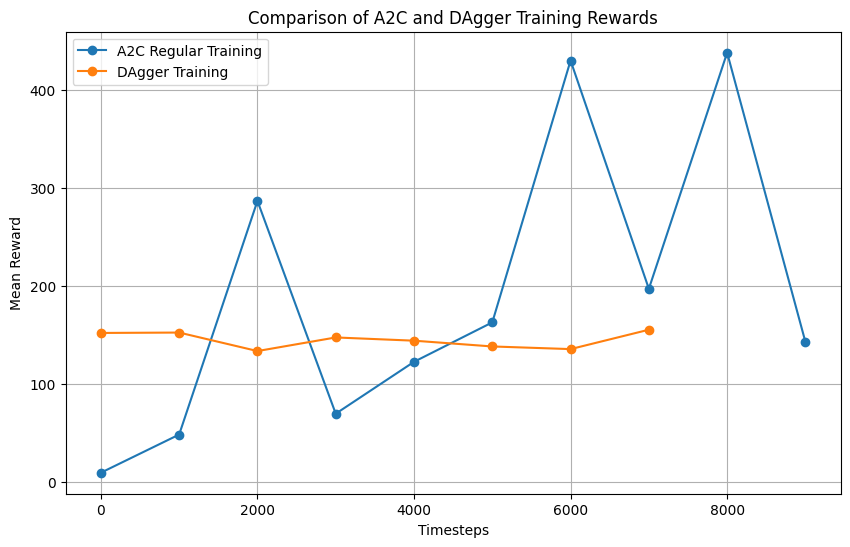

In [ ]:
# Plot the rewards for Regular A2C Training and DAgger Training
plt.figure(figsize=(10, 6))
plt.plot(range(0, 10000, 1000), regular_rewards, label="A2C Regular Training", marker="o")
plt.plot(range(0, 8000, 1000), dagger_rewards, label="DAgger Training", marker="o")

plt.xlabel("Timesteps")
plt.ylabel("Mean Reward")
plt.title("Comparison of A2C and DAgger Training Rewards")
plt.legend()

plt.grid(True)
plt.show()

# Training a GAIL Model Using an Expert Policy

In this section, we walk through the process of setting up and training a **Generative Adversarial Imitation Learning (GAIL)** model using a pre-trained expert in environments such as `CartPole-v1`, `Pendulum-v0`, and `BipedalWalker-v3`.

The full pipeline includes:
- Setting up directories and configurations,
- Loading and validating the environment,
- Initializing expert and GAIL models,
- Training GAIL using the expert’s behavior,
- Saving the final results and model weights.

## Summary

This pipeline implements a complete imitation learning workflow using GAIL. The process involves:
- Setting up a Gym-compatible environment,
- Loading a pre-trained expert model,
- Training a GAIL agent to mimic the expert,
- Storing the training results and model artifacts.

By following this structure, we can compare GAIL's performance to reinforcement learning approaches like PPO or A2C, and evaluate the efficiency of learning from demonstrations.

---


### **1. `setup_directories(env_name)`** (5 Points)

```python
This function handles directory setup and expert configuration:
- Creates a base checkpoint directory (`ckpts/`).
- Validates if the provided environment name is supported.
- Loads the expert model configuration from a JSON file.
- Creates a subdirectory for storing environment-specific checkpoints.

**Purpose:** Prepare the file system and load settings for the expert model.

In [13]:
import os
import json
import pickle
import argparse
import torch
import gym
import sys
import matplotlib.pyplot as plt
import zipfile

# First, unzip the utils folder
with zipfile.ZipFile('utils.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Add utils directory to Python path and import necessary modules
sys.path.append('./utils')

from nets import *
from gail import *
from funcs import *

In [14]:
def setup_directories(env_name):
    # Create checkpoint directory
    ckpt_path = "ckpts"
    if not os.path.isdir(ckpt_path):
        os.mkdir(ckpt_path)

    # Validate environment name
    if env_name not in ["CartPole-v1", "Pendulum-v0", "BipedalWalker-v3"]:
        print("The environment name is wrong!")
        return None

    # Set expert checkpoint path to utils directory
    expert_ckpt_path = "./utils"

    # Load expert config from utils/config.json
    expert_config_file = os.path.join(expert_ckpt_path, "config.json")
    if not os.path.exists(expert_config_file):
        print(f"Expert config file not found at {expert_config_file}")
        return None

    with open(expert_config_file, 'r') as f:
        expert_config = json.load(f)

    # Create environment-specific checkpoint directory
    ckpt_path = os.path.join(ckpt_path, env_name)
    if not os.path.isdir(ckpt_path):
        os.makedirs(ckpt_path)

    print(f"Setup complete - using expert config from {expert_config_file}")
    return expert_ckpt_path, expert_config, ckpt_path

### **2. `load_and_save_configs(expert_ckpt_path, ckpt_path, env_name)`** (10 Points)
- Loads a general configuration file (`config.json`) that contains training hyperparameters specific to the environment.
- Saves these configurations to the current checkpoint folder for logging and reproducibility.

**Purpose:** Fetch and store hyperparameters needed for training the GAIL model.

In [15]:
def load_and_save_configs(expert_ckpt_path, ckpt_path, env_name):
    # Load the config.json file from utils directory
    config_file = os.path.join(expert_ckpt_path, "config.json")
    if not os.path.exists(config_file):
        print(f"Config file not found at {config_file}")
        return None

    with open(config_file, 'r') as f:
        config = json.load(f)

    # Save the config to the checkpoint directory for reproducibility
    config_save_path = os.path.join(ckpt_path, "config.json")
    with open(config_save_path, 'w') as f:
        json.dump(config, f, indent=4)

    print(f"Configuration loaded from {config_file} and saved to {config_save_path}")
    return config

### **3. `setup_environment(env_name)`** (10 Points)

- Initializes the chosen environment using OpenAI Gym.
- Extracts the dimensions of the state and action spaces.
- Checks whether the action space is discrete (e.g., CartPole) or continuous (e.g., Pendulum).

**Purpose:** Provide key environment information for model initialization.


In [16]:
def setup_environment(env_name):
    # Create the environment
    env = gym.make(env_name)

    # Get state dimension
    state_dim = env.observation_space.shape[0]

    # Check if action space is discrete or continuous and get action dimension
    if hasattr(env.action_space, 'n'):  # Discrete action space
        action_dim = env.action_space.n
        discrete = True
    else:  # Continuous action space
        action_dim = env.action_space.shape[0]
        discrete = False

    return env, state_dim, action_dim, discrete

### **4. `setup_device()`** (+5 Points for running on GPU)
- Checks if a GPU (`cuda`) is available.
- Falls back to CPU if GPU is not detected.

**Purpose:** Ensure the training runs on the optimal hardware available.


In [17]:
def setup_device():
    # Check if CUDA is available and set device accordingly
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    else:
        device = torch.device("cpu")
        print("CUDA not available. Using CPU.")

    return device

### **5. `initialize_expert(...)`** (15 Points)

- Initializes an `Expert` model using its architecture config and environment dimensions.
- Loads pre-trained policy weights (`policy.ckpt`) from the expert checkpoint.

**Purpose:** Prepare a high-performance expert model whose behavior GAIL will learn to imitate.

In [18]:
def initialize_expert(expert_ckpt_path, state_dim, action_dim, discrete, expert_config, device, env_name):
    # Get the environment-specific config
    if env_name in expert_config:
        train_config = expert_config[env_name]
    else:
        print(f"No configuration found for environment: {env_name}")
        return None

    # Initialize the Expert model with the correct parameters
    expert = Expert(
        state_dim=state_dim,
        action_dim=action_dim,
        discrete=discrete,
        train_config=train_config
    ).to(device)

    # Load the policy checkpoint for the expert
    policy_checkpoint_path = os.path.join(expert_ckpt_path, "policy.ckpt")
    if not os.path.exists(policy_checkpoint_path):
        print(f"Expert policy checkpoint not found at {policy_checkpoint_path}")
        return None

    # Load the trained weights
    expert.pi.load_state_dict(torch.load(policy_checkpoint_path, map_location=device))
    expert.eval()  # Set to evaluation mode

    print(f"Expert model loaded from {policy_checkpoint_path}")
    return expert

### **6. `initialize_gail_model(...)`** (15 Points)
- Initializes the `GAIL` model using environment specs and configuration parameters.
- The model includes a policy, value function, and discriminator.

**Purpose:** Set up the GAIL agent that learns by interacting with the environment and distinguishing between expert and learner behavior.


In [19]:
def initialize_gail_model(state_dim, action_dim, discrete, config, device):
    # Initialize the GAIL model with the correct parameters
    model = GAIL(
        state_dim=state_dim,
        action_dim=action_dim,
        discrete=discrete,
        train_config=config
    ).to(device)

    print(f"GAIL model initialized with state_dim={state_dim}, action_dim={action_dim}, discrete={discrete}")
    return model

### **7. `train_gail_model(model, env, expert)`** (20 Points)
- Runs the training loop for the GAIL agent.
- The GAIL model tries to imitate the expert by fooling the discriminator into thinking the learner’s actions come from the expert.

**Purpose:** Train the policy using imitation learning via adversarial training.


In [20]:
def train_gail_model(model, env, expert):
    # Verify the training loop is functioning as expected
    results = model.train(env, expert)
    return results

### **8. `save_results_and_checkpoints(...)`** (+5 Points)
- Saves training results (e.g., episode returns) as a pickle file.
- Saves the weights of the trained components: policy, value network, and discriminator.

**Purpose:** Store the final model and results for evaluation and future use.


In [21]:
def save_results_and_checkpoints(ckpt_path, results, model):
    # Save training results as a pickle file
    results_path = os.path.join(ckpt_path, "results.pkl")
    with open(results_path, 'wb') as f:
        pickle.dump(results, f)
    print(f"Training results saved to {results_path}")

    # Save model weights for each component
    # Save policy network
    policy_path = os.path.join(ckpt_path, "policy.ckpt")
    torch.save(model.pi.state_dict(), policy_path)

    # Save value network
    value_path = os.path.join(ckpt_path, "value.ckpt")
    torch.save(model.v.state_dict(), value_path)

    # Save discriminator network
    discriminator_path = os.path.join(ckpt_path, "discriminator.ckpt")
    torch.save(model.d.state_dict(), discriminator_path)

    print(f"Model checkpoints saved:")
    print(f"  - Policy: {policy_path}")
    print(f"  - Value: {value_path}")
    print(f"  - Discriminator: {discriminator_path}")

### 9. **`main()`** (25 Points)
- The main function orchestrates the entire GAIL training process.
- It calls all the above functions in sequence to set up directories, load configurations, initialize models, train the GAIL agent, and save results.


In [22]:
def main(env_name):
    # Set up directories and validate environment
    expert_ckpt_path, expert_config, ckpt_path = setup_directories(env_name)
    if not expert_ckpt_path:
        return
    # Load and save configuration files
    config = load_and_save_configs(expert_ckpt_path, ckpt_path, env_name)
    # Set up environment and get dimensions
    env, state_dim, action_dim, discrete = setup_environment(env_name)
    # Set up the device (CPU or GPU)
    device = setup_device()
    # Initialize expert model
    expert = initialize_expert(expert_ckpt_path, state_dim, action_dim, discrete, expert_config, device, env_name)
    if expert is None:
        print("Failed to initialize expert model. Exiting.")
        return
    # Initialize GAIL model
    model = initialize_gail_model(state_dim, action_dim, discrete, config[env_name], device)
    # Train the GAIL model
    results = train_gail_model(model, env, expert)
    # Close the environment
    env.close()
    # Save results and model checkpoints
    save_results_and_checkpoints(ckpt_path, results, model)

### 10. **`run_gail(env_name)`** (+5 Points if using parse_args)
- This function serves as the entry point for running the GAIL training pipeline.
- It accepts an environment name as input and executes the entire GAIL training process.


In [ ]:
# Fix for newer NumPy versions
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_
if not hasattr(np, 'int0'):
    np.int0 = np.intp

# Ensure that the command-line arguments are parsed correctly
parser = argparse.ArgumentParser(description='Train GAIL model with expert policy')
parser.add_argument('--env', type=str, default='CartPole-v1',
                    choices=['CartPole-v1', 'Pendulum-v0', 'BipedalWalker-v3'],
                    help='Environment name for GAIL training')

# For Jupyter notebook, we need to handle the case where no command line args exist
try:
    args = parser.parse_args()
except SystemExit:
    # If running in Jupyter, use default arguments
    args = argparse.Namespace(env='CartPole-v1')

# Run the Main Function
# Verify that the correct environment name is passed to the main function
main(args.env)

usage: colab_kernel_launcher.py [-h]
                                [--env {CartPole-v1,Pendulum-v0,BipedalWalker-v3}]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-2943b63c-ce2e-4f17-8783-a73418d61ab5.json
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Setup complete - using expert config from ./utils/config.json
Configuration loaded from ./utils/config.json and saved to ckpts/CartPole-v1/config.json
Using GPU: Tesla T4
Expert model loaded from ./utils/policy.ckpt
GAIL model initialized with state_dim=4, action_dim=2, discrete=True
Expert Reward Mean: 500.0
Iterations: 1,   Reward Mean: 23.058139534883722
Iterations: 2,   Reward Mean: 24.25925925925926
Iterations: 3,   Reward Mean: 34.89473684210526
Iterations: 4,   Reward Mean: 50.61538461538461
Iterations: 5,   Reward Mean: 74.96
Iterations: 6,   Reward Mean: 170.8181818181818
Iterations: 7,   Reward Mean: 164.91666666666666
Iterations: 8,   Reward Mean: 232.625
Iterations: 9,   Reward Mean: 317.5
Iterations: 10,   Reward Mean: 313.5
Iterations: 11,   Reward Mean: 422.75
Iterations: 12,   Reward Mean: 311.5
Iterations: 13,   Reward Mean: 375.6
Iterations: 14,   Reward Mean: 316.5
Iterations: 15,   Reward Mean: 457.25
Iterations: 16,   Reward Mean: 488.5
Iterations: 17,   Reward Mea

provide a plot like below:

![image.png](attachment:image.png)

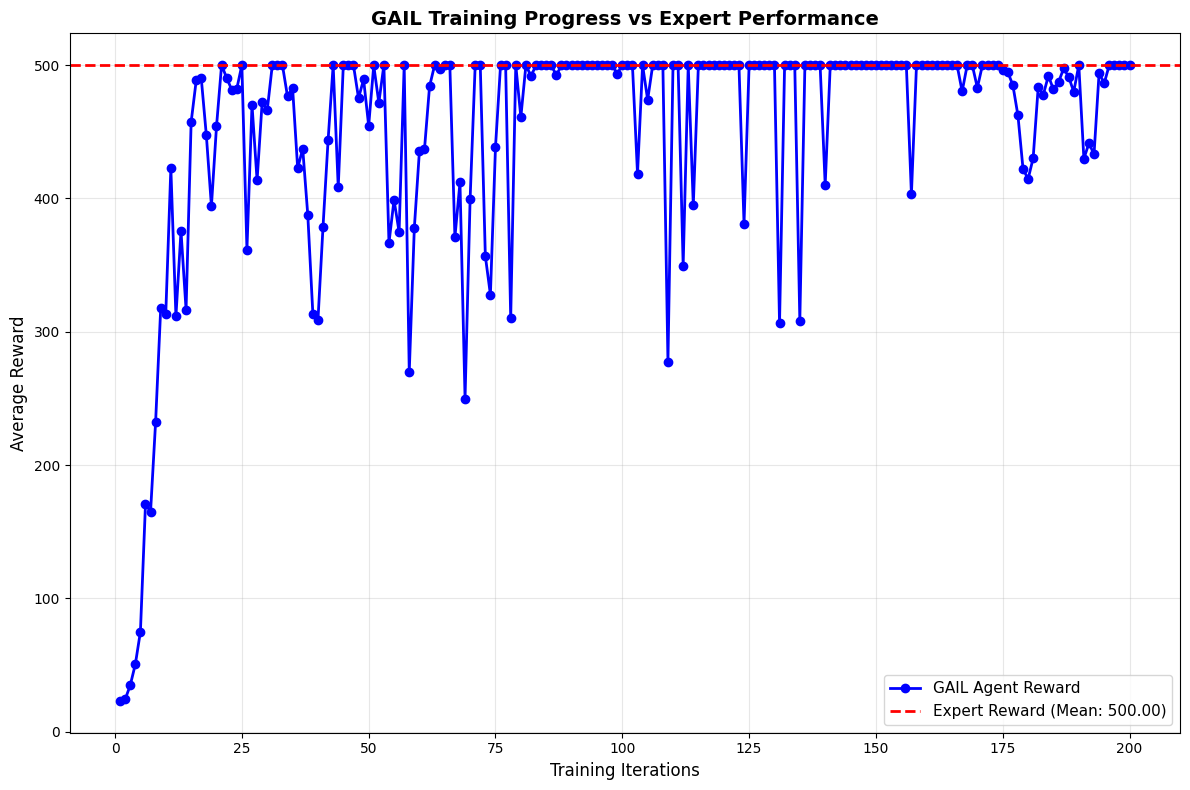


Training Summary:
Expert Average Reward: 500.00
GAIL Final Average Reward: 500.00
Performance Gap: 0.00


In [25]:
# Load the results from the saved pickle file
results_path = os.path.join("ckpts", "CartPole-v1", "results.pkl")
with open(results_path, "rb") as f:
    results = pickle.load(f)

# Extract results from GAIL training and rename variables
expert_reward_mean, gail_reward_iterations = results

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the GAIL training progress
iterations = range(1, len(gail_reward_iterations) + 1)
plt.plot(iterations, gail_reward_iterations, 'b-', linewidth=2, marker='o', markersize=6, label='GAIL Agent Reward')

# Add horizontal line for expert performance
plt.axhline(y=expert_reward_mean, color='r', linestyle='--', linewidth=2, label=f'Expert Reward (Mean: {expert_reward_mean:.2f})')

# Customize the plot
plt.xlabel('Training Iterations', fontsize=12)
plt.ylabel('Average Reward', fontsize=12)
plt.title('GAIL Training Progress vs Expert Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add some styling
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTraining Summary:")
print(f"Expert Average Reward: {expert_reward_mean:.2f}")
print(f"GAIL Final Average Reward: {gail_reward_iterations[-1]:.2f}")
print(f"Performance Gap: {abs(expert_reward_mean - gail_reward_iterations[-1]):.2f}")